In [1]:
import pandas as pd
df = pd.read_csv("Indian_Kids_Screen_Time.csv")


In [2]:
df.head()
df.info()
df.describe()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


(9712, 8)

In [3]:
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [12]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("Unknown")


In [13]:
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,0
Urban_or_Rural,0


In [4]:
df.duplicated().sum()


np.int64(44)

**Univariate analysis**


Text(0.5, 1.0, 'Urban vs Rural')

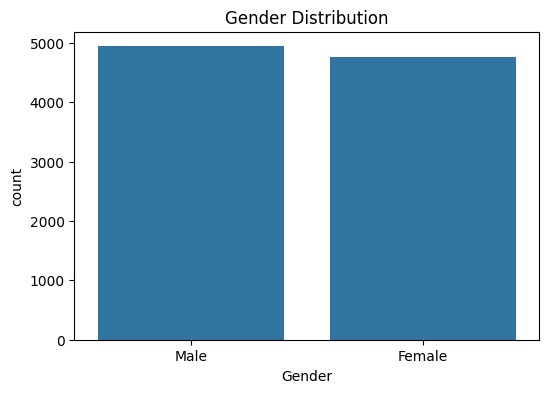

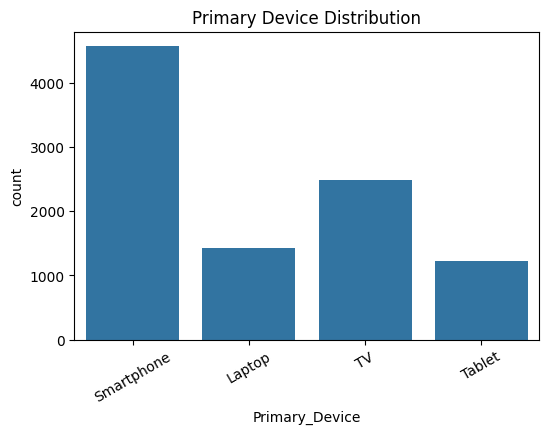

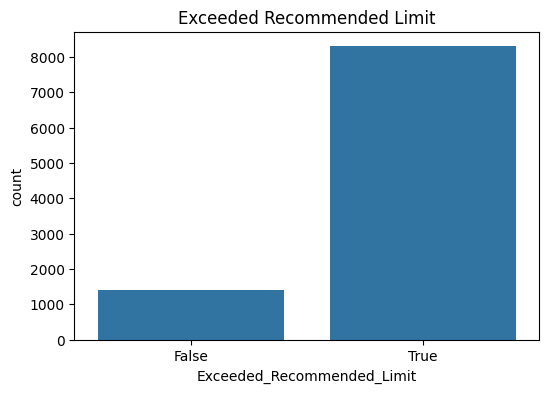

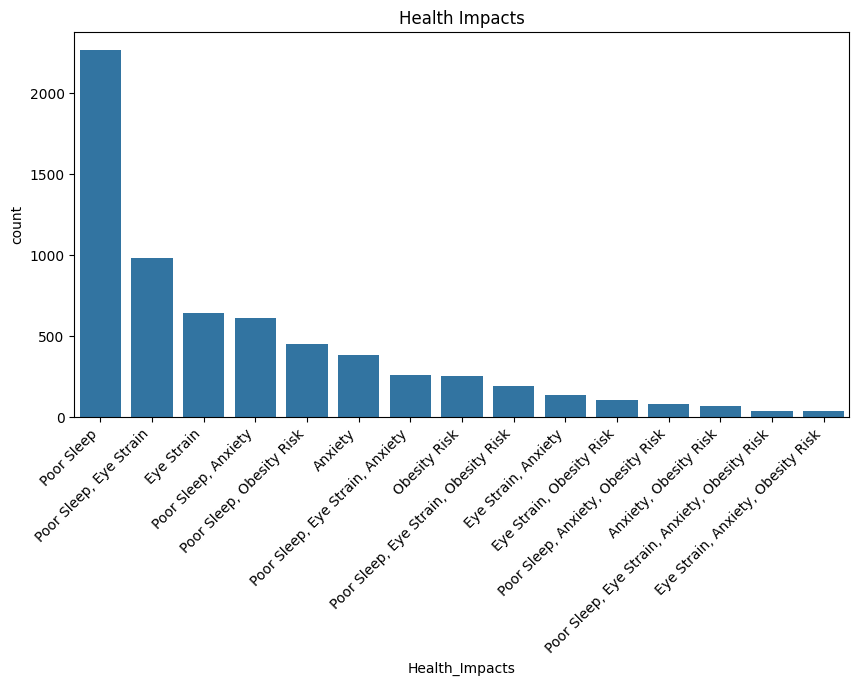

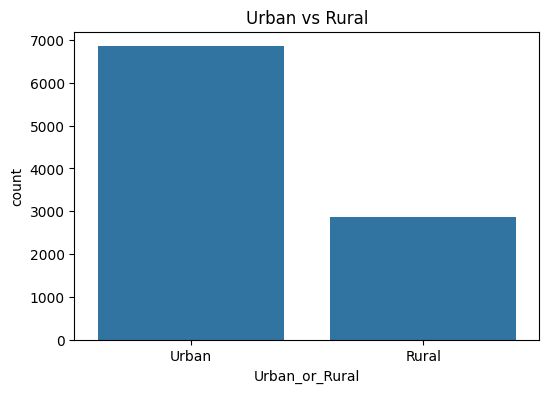

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

plt.figure(figsize=(6,4))
sns.countplot(x='Primary_Device', data=df)
plt.title("Primary Device Distribution")
plt.xticks(rotation=30)

plt.figure(figsize=(6,4))
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Exceeded Recommended Limit")

plt.figure(figsize=(10,5))
sns.countplot(x='Health_Impacts', data=df, order=df['Health_Impacts'].value_counts().index)
plt.title("Health Impacts")
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(6,4))
sns.countplot(x='Urban_or_Rural', data=df)
plt.title("Urban vs Rural")


**Bivariate analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

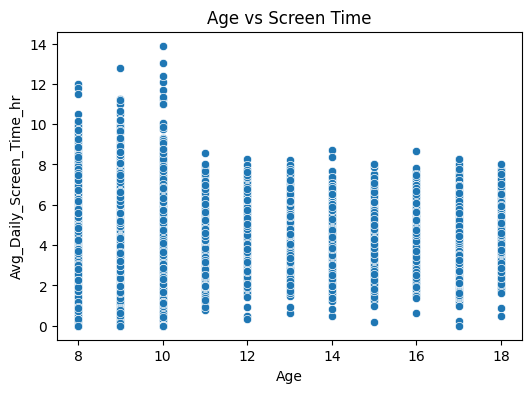

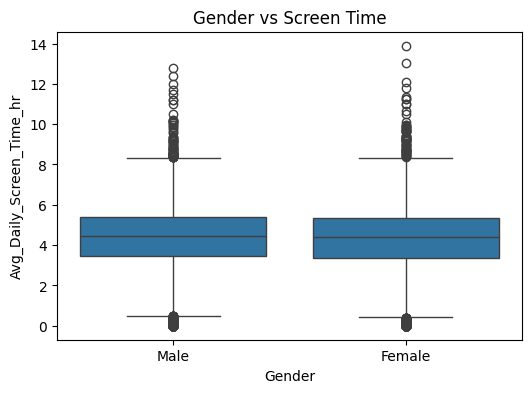

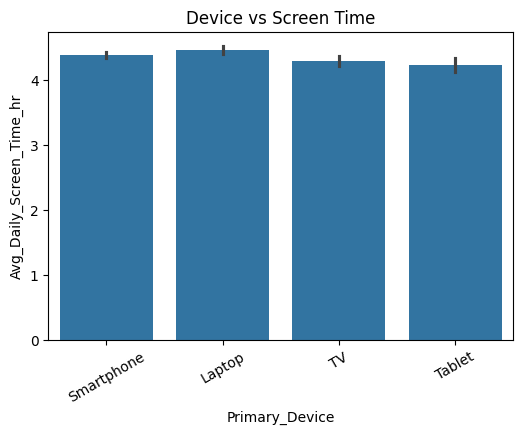

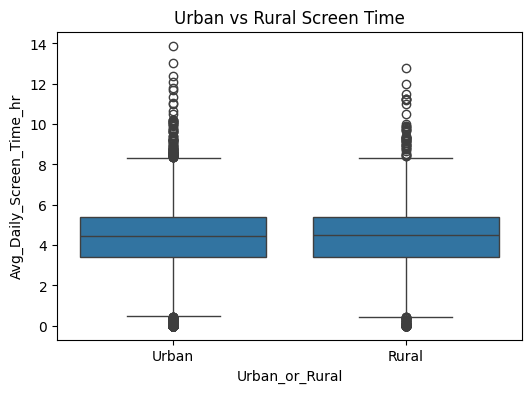

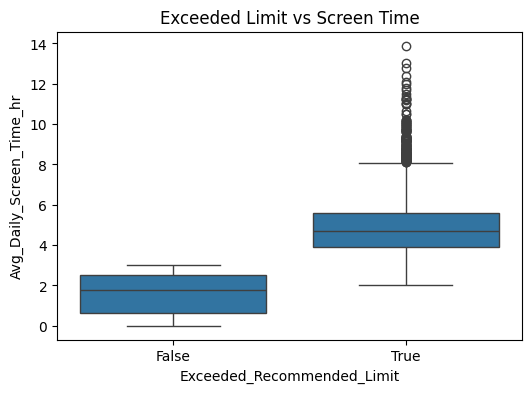

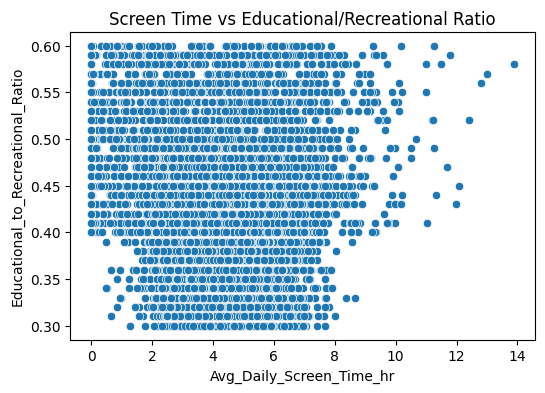

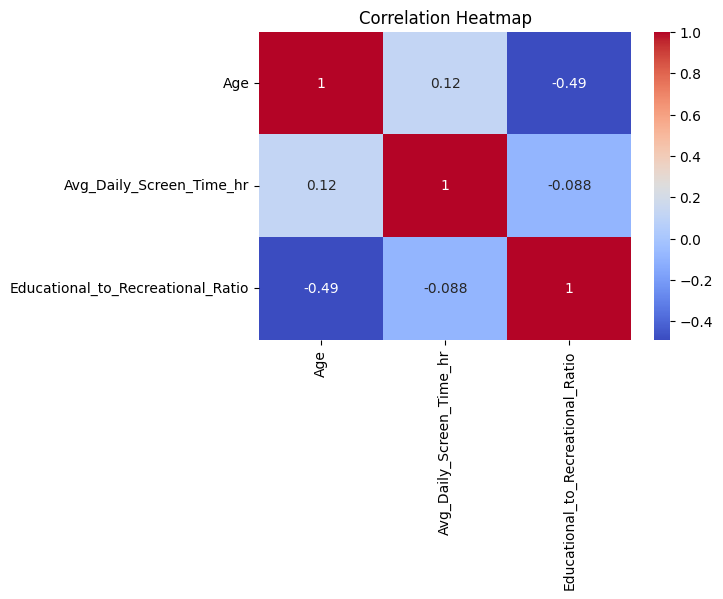

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Age vs Screen Time")

plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Gender vs Screen Time")

plt.figure(figsize=(6,4))
sns.barplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Device vs Screen Time")
plt.xticks(rotation=30)

plt.figure(figsize=(6,4))
sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Urban vs Rural Screen Time")

plt.figure(figsize=(6,4))
sns.boxplot(x='Exceeded_Recommended_Limit', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Exceeded Limit vs Screen Time")

plt.figure(figsize=(6,4))
sns.scatterplot(x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio', data=df)
plt.title("Screen Time vs Educational/Recreational Ratio")

plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


**Multivariate analysis**

Text(0.5, 1.0, 'Screen Time by Urban/Rural & Exceeded Limit')

<Figure size 700x500 with 0 Axes>

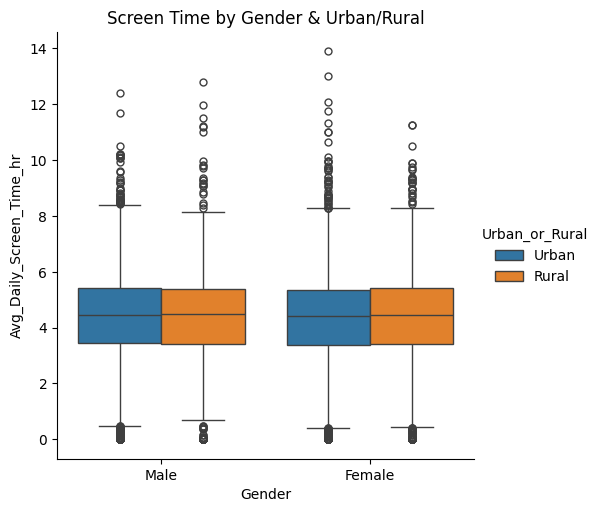

<Figure size 700x500 with 0 Axes>

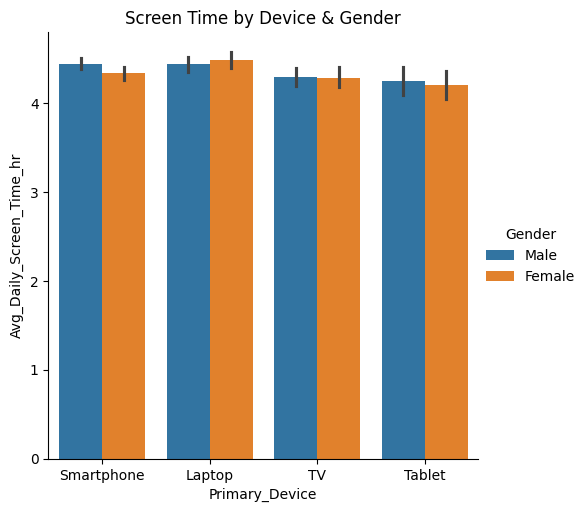

<Figure size 700x500 with 0 Axes>

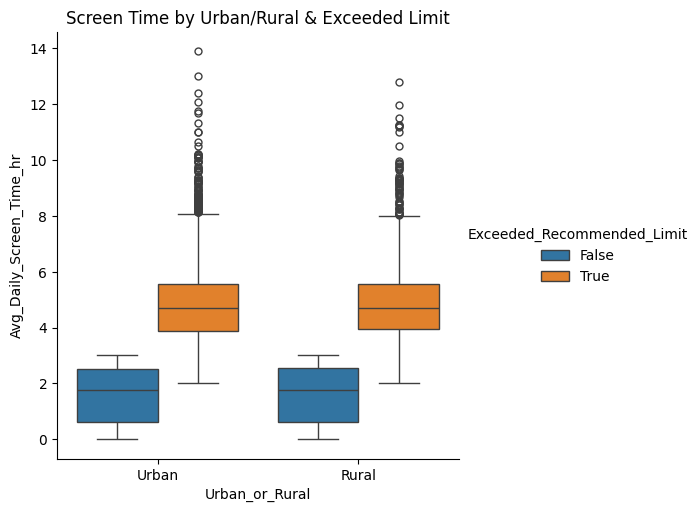

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.catplot(x="Gender", y="Avg_Daily_Screen_Time_hr", hue="Urban_or_Rural", kind="box", data=df)
plt.title("Screen Time by Gender & Urban/Rural")

plt.figure(figsize=(7,5))
sns.catplot(x="Primary_Device", y="Avg_Daily_Screen_Time_hr", hue="Gender", kind="bar", data=df)
plt.title("Screen Time by Device & Gender")

plt.figure(figsize=(7,5))
sns.catplot(x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", hue="Exceeded_Recommended_Limit", kind="box", data=df)
plt.title("Screen Time by Urban/Rural & Exceeded Limit")
